## Exploratory Analysis Questions

1. **General Performance Statistics**
   - What is the average and median performance time across all ultra marathons in 2021?
   - How do these performance statistics vary between male and female athletes?
2. **Age Group Analysis**
   - How does athlete performance (average speed and finish time) vary across different age groups?
   - Is there an age group that consistently outperforms the others in ultra marathons?
3. **Event Analysis**
   - Does the season the event took place increase the difficulty of the event?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
M2021 = pd.read_csv('cleaned_M2021.csv',index_col= 0)
M2021

,event_date,event_name,distance,number_of_finishers,athlete_id,athlete_gender,athlete_age,athlete_performance,athlete_average_speed
0,10.04.2021,The Zion 100 km Run (USA),100km,217,216401,M,51,0 days 10:49:12,9.242
1,10.04.2021,The Zion 100 km Run (USA),100km,217,387546,M,37,0 days 10:50:28,9.224
2,10.04.2021,The Zion 100 km Run (USA),100km,217,55330,M,47,0 days 10:56:55,9.134
3,10.04.2021,The Zion 100 km Run (USA),100km,217,387283,M,32,0 days 11:51:46,8.430
4,10.04.2021,The Zion 100 km Run (USA),100km,217,240506,M,34,0 days 11:52:56,8.416
...,...,...,...,...,...,...,...,...,...
5015,23.10.2021,Quicksilver 100 km Endurance Run (USA),100km,133,947274,M,30,0 days 16:29:06,6.066
5016,23.10.2021,Quicksilver 100 km Endurance Run (USA),100km,133,25914,M,60,0 days 16:34:44,6.032
5017,23.10.2021,Quicksilver 100 km Endurance Run (USA),100km,133,638558,M,38,0 days 16:46:37,5.961
5018,23.10.2021,Quicksilver 100 km Endurance Run (USA),100km,133,46381,M,45,0 days 16:50:12,5.939


#### 1. General Startistics

In [45]:
M2021.describe()

,number_of_finishers,athlete_id,athlete_age,athlete_average_speed
count,5020.000000,5020.000000,5020.000000,5020.000000
mean,120.118526,398715.183466,41.805179,6.514181
std,108.366719,328722.054494,10.131723,1.489154
min,1.000000,73.000000,14.000000,2.151000
25%,31.000000,76074.250000,34.000000,5.561000
50%,76.000000,301253.000000,41.000000,6.315000
75%,204.000000,756023.750000,49.000000,7.239500
max,363.000000,947274.000000,82.000000,16.241000


#### changing the 'athlete_performance' back to timedelta object

In [46]:
M2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5020 entries, 0 to 5019
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   event_date             5020 non-null   object 
 1   event_name             5020 non-null   object 
 2   distance               5020 non-null   object 
 3   number_of_finishers    5020 non-null   int64  
 4   athlete_id             5020 non-null   int64  
 5   athlete_gender         5020 non-null   object 
 6   athlete_age            5020 non-null   int64  
 7   athlete_performance    5020 non-null   object 
 8   athlete_average_speed  5020 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 392.2+ KB


In [3]:
M2021['athlete_performance'] = M2021['athlete_performance'].str.split(' ').str.get(2)
M2021['athlete_performance'] = pd.to_timedelta(M2021['athlete_performance'])
M2021.head()

,event_date,event_name,distance,number_of_finishers,athlete_id,athlete_gender,athlete_age,athlete_performance,athlete_average_speed
0,10.04.2021,The Zion 100 km Run (USA),100km,217,216401,M,51,0 days 10:49:12,9.242
1,10.04.2021,The Zion 100 km Run (USA),100km,217,387546,M,37,0 days 10:50:28,9.224
2,10.04.2021,The Zion 100 km Run (USA),100km,217,55330,M,47,0 days 10:56:55,9.134
3,10.04.2021,The Zion 100 km Run (USA),100km,217,387283,M,32,0 days 11:51:46,8.430
4,10.04.2021,The Zion 100 km Run (USA),100km,217,240506,M,34,0 days 11:52:56,8.416


In [52]:
M2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5020 entries, 0 to 5019
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   event_date             5020 non-null   object 
 1   event_name             5020 non-null   object 
 2   distance               5020 non-null   object 
 3   number_of_finishers    5020 non-null   int64  
 4   athlete_id             5020 non-null   int64  
 5   athlete_gender         5020 non-null   object 
 6   athlete_age            5020 non-null   int64  
 7   athlete_performance    5020 non-null   float64
 8   athlete_average_speed  5020 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 392.2+ KB


#### Changing performance time to seconds to get statistics of that data

In [4]:
M2021['athlete_performance'] = M2021['athlete_performance'].dt.total_seconds()

In [50]:
M2021.head()

,event_date,event_name,distance,number_of_finishers,athlete_id,athlete_gender,athlete_age,athlete_performance,athlete_average_speed
0,10.04.2021,The Zion 100 km Run (USA),100km,217,216401,M,51,38952.0,9.242
1,10.04.2021,The Zion 100 km Run (USA),100km,217,387546,M,37,39028.0,9.224
2,10.04.2021,The Zion 100 km Run (USA),100km,217,55330,M,47,39415.0,9.134
3,10.04.2021,The Zion 100 km Run (USA),100km,217,387283,M,32,42706.0,8.430
4,10.04.2021,The Zion 100 km Run (USA),100km,217,240506,M,34,42776.0,8.416


In [51]:
M2021.describe()

,number_of_finishers,athlete_id,athlete_age,athlete_performance,athlete_average_speed
count,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000
mean,120.118526,398715.183466,41.805179,55770.756375,6.514181
std,108.366719,328722.054494,10.131723,13292.412074,1.489154
min,1.000000,73.000000,14.000000,12.000000,2.151000
25%,31.000000,76074.250000,34.000000,48841.000000,5.561000
50%,76.000000,301253.000000,41.000000,56459.500000,6.315000
75%,204.000000,756023.750000,49.000000,63905.500000,7.239500
max,363.000000,947274.000000,82.000000,86343.000000,16.241000


#### Calculating the average and median for all the ultramarathons in 2021

In [5]:
Average = pd.to_timedelta(M2021['athlete_performance'].mean(), unit='s')
Median = pd.to_timedelta(M2021['athlete_performance'].median(), unit='s')

print(f'The average athlete performance: {Average}'
       f'\nThe median athlete performance: {Median}'
     )

The average athlete performance: 0 days 15:29:30.756374502
The median athlete performance: 0 days 15:40:59.500000


#### Calculating the average and median for all the ultramarathons in 2021 according to gender

In [6]:
gender_M2021 = M2021.groupby('athlete_gender')['athlete_performance'].agg(['mean', 'median']).apply(lambda x: pd.to_timedelta(x, unit='s'))
gender_M2021

,mean,median
athlete_gender,,
F,0 days 15:48:38.619350282,0 days 16:15:09.500000
M,0 days 15:21:59.764705882,0 days 15:28:32


In [7]:
M2021['athlete_gender'].value_counts()

athlete_gender
M    3604
F    1416
Name: count, dtype: int64

### Overall Performance
- **Average Performance Time:** The average performance time for all athletes is around 15 hours, 29 minutes, and 30 seconds. This average indicates the central tendency of performance times, suggesting a typical duration that an athlete might take to complete an ultra marathon.
- **Median Performance Time:** The median performance time is approximately 15 hours, 40 minutes, and 59 seconds. The closeness of the median to the average suggests that the distribution of performance times is relatively symmetric and not heavily skewed.

### Performance by Gender
- **Male Athletes:**
  - **Average Performance Time:** Approximately 15 hours, 21 minutes, and 59 seconds, which is slightly faster than the overall average.
  - **Median Performance Time:** Approximately 15 hours, 28 minutes, and 32 seconds, indicating a concentrated distribution of performance times among male athletes.
- **Female Athletes:**
  - **Average Performance Time:** Approximately 15 hours, 48 minutes, and 38 seconds, indicating that on average, female athletes take longer to complete the ultra marathons than their male counterparts.
  - **Median Performance Time:** Approximately 16 hours, 15 minutes, and 9 seconds, suggesting a potential for a more spread-out distribution of performance times or the presence of outliers.

### Considerations
The median times being slightly different from the mean times, especially for female athletes, could suggest a distribution that has outliers or a non-uniform spread of athlete performance times. Moreover, the difference in the number of male (3604 participants) and female (1416 participants) athletes could influence the comparison of average and median times across genders. A larger sample size for one gender could potentially result in a more stable average, whereas a smaller sample size might be more susceptible to skew from outliers.

### Age Group Analysis

In [8]:
def categorize_age(age):
    if   age < 18: return 'Below 18'
    elif age < 28: return '18-27'
    elif age < 38: return '28-37'
    elif age < 48: return '38-47'
    elif age < 58: return '48-57'
    elif age < 68: return '58-67'

M2021['age_group'] = M2021['athlete_age'].apply(categorize_age)
M2021.head()

,event_date,event_name,distance,number_of_finishers,athlete_id,athlete_gender,athlete_age,athlete_performance,athlete_average_speed,age_group
0,10.04.2021,The Zion 100 km Run (USA),100km,217,216401,M,51,38952.0,9.242,48-57
1,10.04.2021,The Zion 100 km Run (USA),100km,217,387546,M,37,39028.0,9.224,28-37
2,10.04.2021,The Zion 100 km Run (USA),100km,217,55330,M,47,39415.0,9.134,38-47
3,10.04.2021,The Zion 100 km Run (USA),100km,217,387283,M,32,42706.0,8.430,28-37
4,10.04.2021,The Zion 100 km Run (USA),100km,217,240506,M,34,42776.0,8.416,28-37


In [9]:
age_group_analysis = M2021.groupby('age_group')[['athlete_performance', 'athlete_average_speed']].agg(['mean', 'median'])
age_group_analysis

athlete_performance          athlete_average_speed        
                         mean   median                  mean  median
age_group                                                           
18-27            52834.985755  52674.0              7.031943  6.7770
28-37            53340.630802  53765.5              6.952610  6.6225
38-47            56313.343121  56664.0              6.440497  6.2960
48-57            57448.092734  58889.5              6.151780  5.9985
58-67            60605.261682  61808.0              5.789240  5.7310
Below 18         57213.000000  56713.0              6.485600  6.3480

In [10]:
M2021['age_group'].value_counts()

age_group
38-47       1839
28-37       1422
48-57       1046
18-27        351
58-67        321
Below 18       5
Name: count, dtype: int64

#### Making a combined bar chart using 'subplots' function to visualize the data shown above

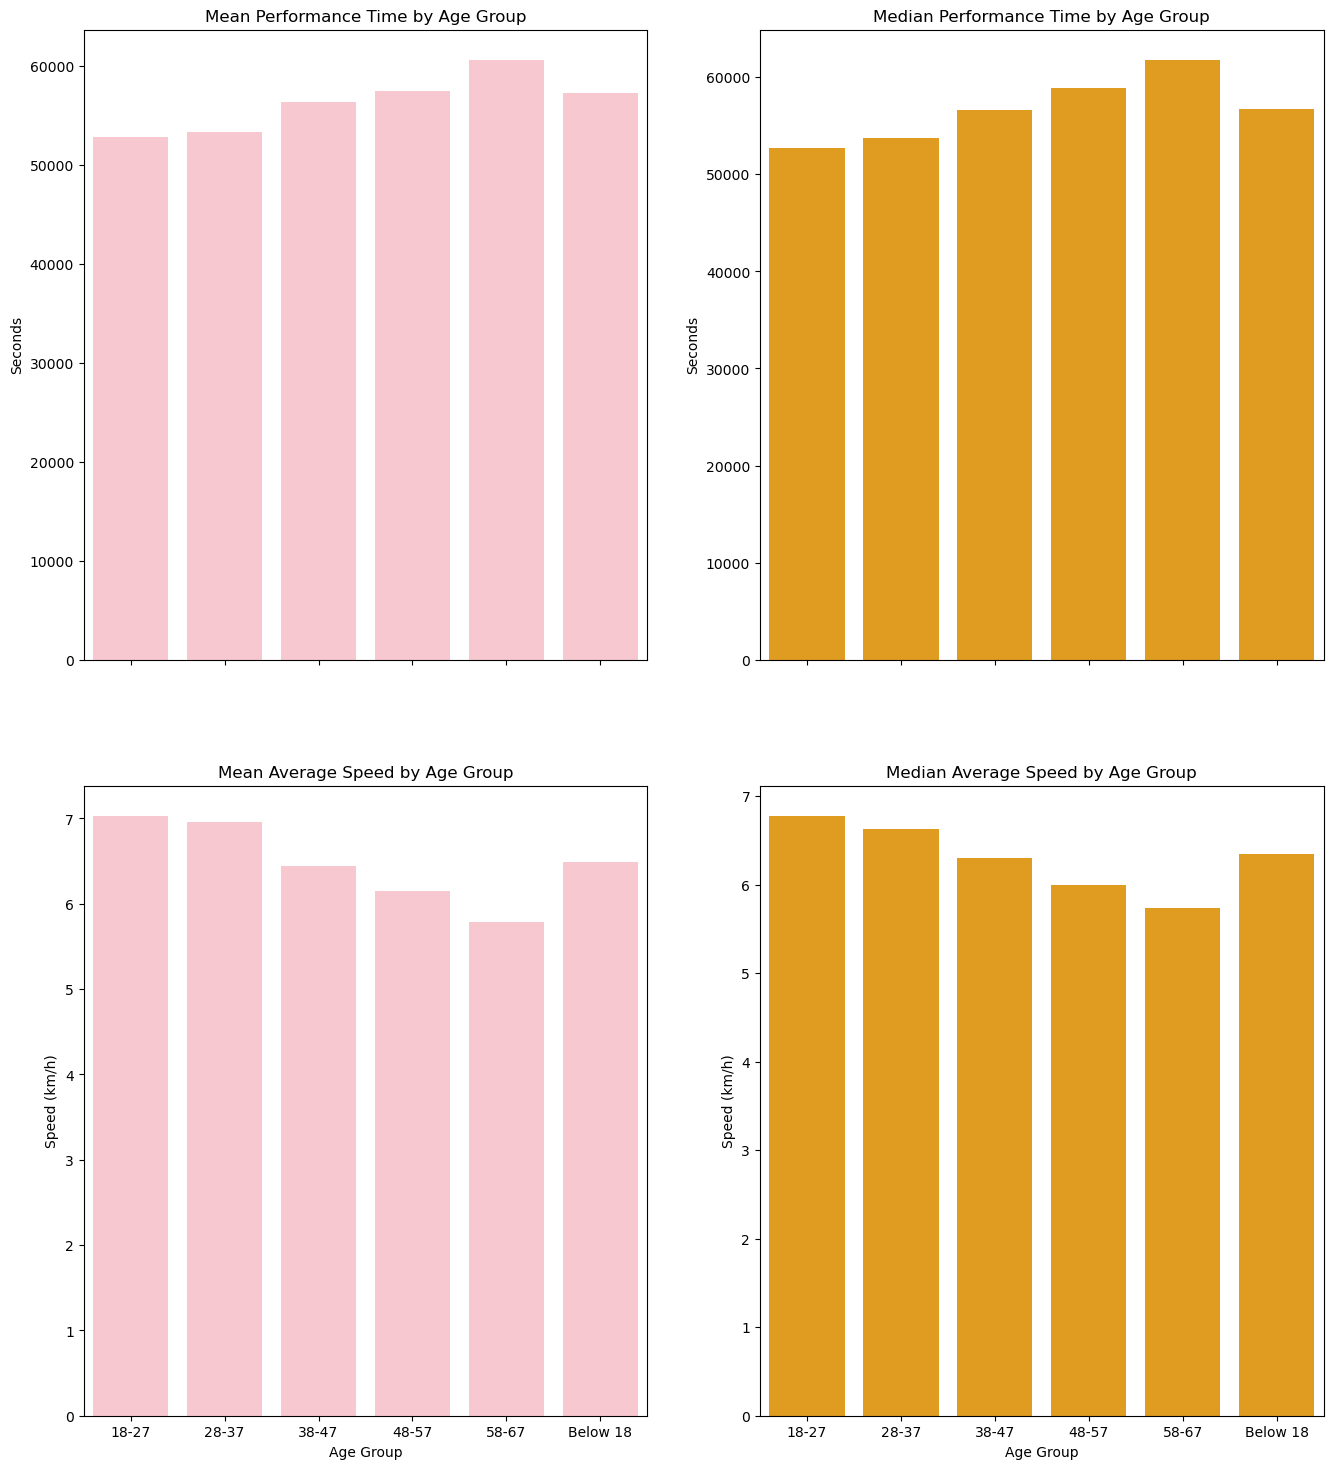

In [11]:
fig, axes = plt.subplots(2,2 , figsize = (16, 18), sharex = True)

sns.barplot(x=age_group_analysis.index, y='mean', data=age_group_analysis['athlete_performance'], ax=axes[0, 0], color= 'pink')
axes[0, 0].set_title('Mean Performance Time by Age Group')
axes[0, 0].set_ylabel('Seconds')

sns.barplot(x=age_group_analysis.index, y='median', data=age_group_analysis['athlete_performance'], ax=axes[0, 1], color= 'orange')
axes[0, 1].set_title('Median Performance Time by Age Group')
axes[0, 1].set_ylabel('Seconds')

sns.barplot(x=age_group_analysis.index, y='mean', data=age_group_analysis['athlete_average_speed'], ax=axes[1, 0], color= 'pink')
axes[1, 0].set_title('Mean Average Speed by Age Group')
axes[1, 0].set_ylabel('Speed (km/h)')

sns.barplot(x=age_group_analysis.index, y='median', data=age_group_analysis['athlete_average_speed'], ax=axes[1, 1], color= 'orange')
axes[1, 1].set_title('Median Average Speed by Age Group')
axes[1, 1].set_ylabel('Speed (km/h)')

for i in range(2):
    for j in range(2):
        axes[i, j].set_xlabel('Age Group')

plt.show()

## Age Group Analysis Conclusion

- The mean and median performance times increase with age, which suggests that younger athletes tend to complete ultra marathons faster than older athletes. The 18-27 age group shows the fastest times on average, while the 58-67 age group shows the slowest.

- There is a noticeable decline in average speed with increasing age groups. The youngest age group (18-27) has the highest mean and median speeds, while the oldest age group (58-67) has the lowest. This trend is consistent with the increase in performance times.

- The median performance times are relatively close to the mean times for each age group, indicating a symmetric distribution of performance times within each age category.

- While the "Below 18" age group is included in the data, their performance does not surpass that of the "18-27" group. This might be due to various factors, including the smaller number of participants (5) or less experience in ultra marathons.


These trends are important for understanding how age affects ultra marathon performance and can inform training and preparation strategies for athletes in different age brackets.

### Event Analysis

In [91]:
M2021.head()

,event_date,event_name,distance,number_of_finishers,athlete_id,athlete_gender,athlete_age,athlete_performance,athlete_average_speed
0,10.04.2021,The Zion 100 km Run (USA),100km,217,216401,M,51,0 days 10:49:12,9.242
1,10.04.2021,The Zion 100 km Run (USA),100km,217,387546,M,37,0 days 10:50:28,9.224
2,10.04.2021,The Zion 100 km Run (USA),100km,217,55330,M,47,0 days 10:56:55,9.134
3,10.04.2021,The Zion 100 km Run (USA),100km,217,387283,M,32,0 days 11:51:46,8.430
4,10.04.2021,The Zion 100 km Run (USA),100km,217,240506,M,34,0 days 11:52:56,8.416


In [12]:
def categorize_season(event_date):
    month = int(event_date.split('.')[1])
    if   month > 11 or month <= 2: return 'Winter'
    elif month > 8 : return 'Fall'
    elif month > 5 : return 'Summer'
    elif month > 2 : return 'Spring'

M2021['Season'] = M2021['event_date'].apply(categorize_season)
M2021

,event_date,event_name,distance,number_of_finishers,athlete_id,athlete_gender,athlete_age,athlete_performance,athlete_average_speed,age_group,Season
0,10.04.2021,The Zion 100 km Run (USA),100km,217,216401,M,51,38952.0,9.242,48-57,Spring
1,10.04.2021,The Zion 100 km Run (USA),100km,217,387546,M,37,39028.0,9.224,28-37,Spring
2,10.04.2021,The Zion 100 km Run (USA),100km,217,55330,M,47,39415.0,9.134,38-47,Spring
3,10.04.2021,The Zion 100 km Run (USA),100km,217,387283,M,32,42706.0,8.430,28-37,Spring
4,10.04.2021,The Zion 100 km Run (USA),100km,217,240506,M,34,42776.0,8.416,28-37,Spring
...,...,...,...,...,...,...,...,...,...,...,...
5015,23.10.2021,Quicksilver 100 km Endurance Run (USA),100km,133,947274,M,30,59346.0,6.066,28-37,Fall
5016,23.10.2021,Quicksilver 100 km Endurance Run (USA),100km,133,25914,M,60,59684.0,6.032,58-67,Fall
5017,23.10.2021,Quicksilver 100 km Endurance Run (USA),100km,133,638558,M,38,60397.0,5.961,38-47,Fall
5018,23.10.2021,Quicksilver 100 km Endurance Run (USA),100km,133,46381,M,45,60612.0,5.939,38-47,Fall


In [15]:
season_data = M2021.groupby('Season')[['athlete_average_speed', 'athlete_performance']].agg(['mean', 'count'])
season_data

athlete_average_speed       athlete_performance      
                        mean count                mean count
Season                                                      
Fall                6.716348   701        54108.500713   701
Spring              6.701365   737        55535.382632   737
Summer              6.196667  1072        59045.934701  1072
Winter              6.538365  2510        54905.306375  2510

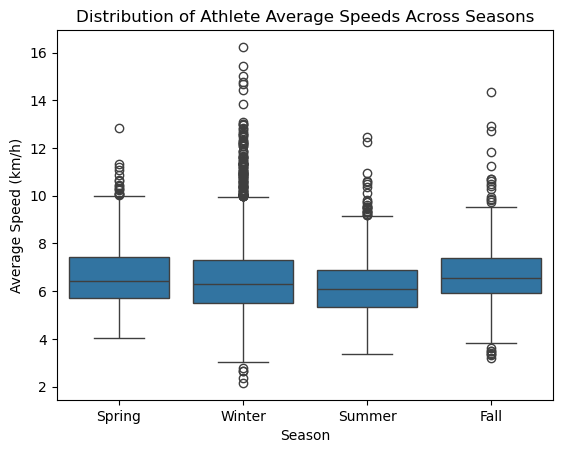

In [16]:
sns.boxplot(x='Season', y='athlete_average_speed', data = M2021)
plt.title('Distribution of Athlete Average Speeds Across Seasons')
plt.xlabel('Season')
plt.ylabel('Average Speed (km/h)')
plt.show()

## Distribution of Athlete Average Speeds Across Seasons - Boxplot Analysis

- **Median Speeds**: The median speed is consistent across seasons, indicating no significant change in the central location of athlete speeds throughout the year.

- **Variability**: The length of the boxes and whiskers shows that there is greater variability in athlete speeds during Summer and Fall, with wider distributions suggesting a mix of performance levels.

- **Outliers**: The presence of outliers, particularly in Winter and Fall, indicates speeds that are notably higher than the typical range. These may represent exceptionally high-performing athletes.

- **Seasonal Patterns**: While the median speeds do not vary greatly, the differences in spread and outliers could reflect the impact of seasonal conditions on athlete performance or the nature of events held in these seasons.


## Seasonal Performance Analysis for Athletes

- **Fall**: Athletes appear to have the fastest average speed in fall at 6.72 km/h, and the performance time also suggests efficiency, with an average of approximately 54,108.5 seconds. The data for fall, with 701 counts for both speed and performance, might imply optimal running conditions and the athletes' peak competitive form during this season.

- **Spring**: With an average speed closely following fall, at 6.70 km/h, and a mean performance time of approximately 55,535.4 seconds, the spring season also sees a considerable number of participants (737). This could reflect the typically mild weather conducive to good performance.

- **Summer**: The summer months show a slower average speed of 6.20 km/h with a longer mean performance time of approximately 59,045.9 seconds. This season records the slowest average speeds and the longest times, which may be attributed to higher temperatures affecting performance despite the highest count of participants at 1072.

- **Winter**: The average speed in winter is 6.54 km/h, with the mean performance time around 54,905.3 seconds, both figures being more favorable than those in summer. This is interesting considering winter conditions can be harsh; however, the largest participant count at 2510 suggests that events might be situated in milder climates or that there is a winter-running enthusiast demographic.

The pattern here indicates that while athlete performance does fluctuate with the seasons, the differences in average speeds are relatively modest. However, the mean performance times do vary more substantially, particularly between summer and the cooler seasons. The substantial count difference across seasons could point to seasonal event availability and participants' willingness to compete in varying conditions. It may also suggest that athletes' training and preparation are influenced by seasonal factors, possibly due to variations in daylight hours, weather, and the types of events scheduled.
